<a href="https://colab.research.google.com/github/aruaru0/python-codes/blob/main/pymc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sklearnで線形回帰

a = 0.5021551846596773, b = 2.049708701433307


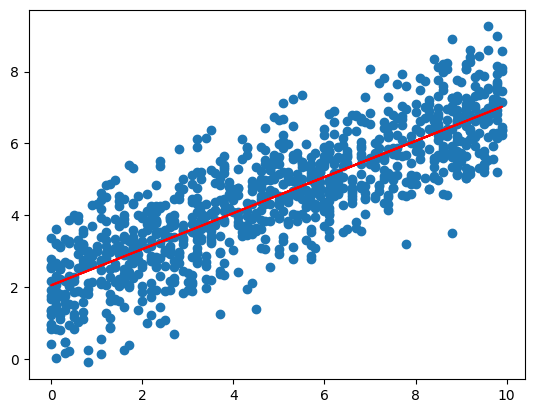

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)

x = np.random.randint(0, 100, 1000)/10
a,b = 0.5, 2
y = a*x + b + np.random.randn(1000)

X = x.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

y_pred = reg.predict(X)

print(f"a = {reg.coef_[0]}, b = {reg.intercept_}")

plt.scatter(x, y)
plt.plot(X, y_pred, color="red")
plt.show()

# Pymcで予測

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.502,0.011,0.483,0.523,0.000,0.000,790.0,942.0,1.0
b,2.051,0.059,1.939,2.157,0.002,0.001,795.0,1092.0,1.0
sigma,0.993,0.022,0.954,1.033,0.001,0.000,1229.0,1393.0,1.0


a = 0.5018975956556755, b = 2.0510944334308197, sigma=0.9929723347372681


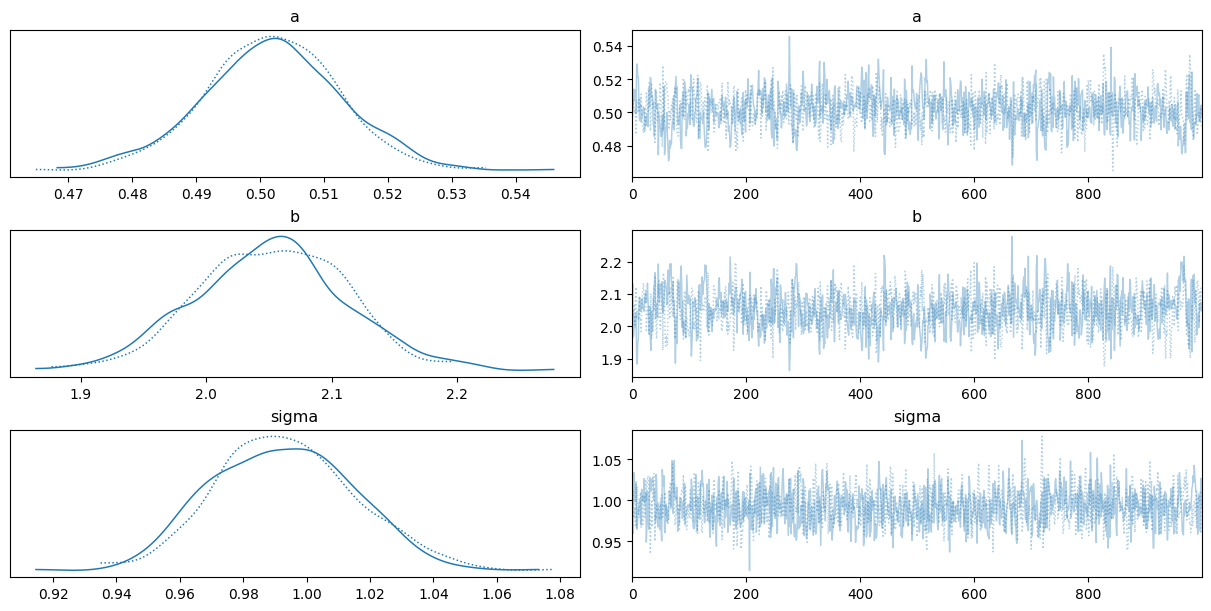

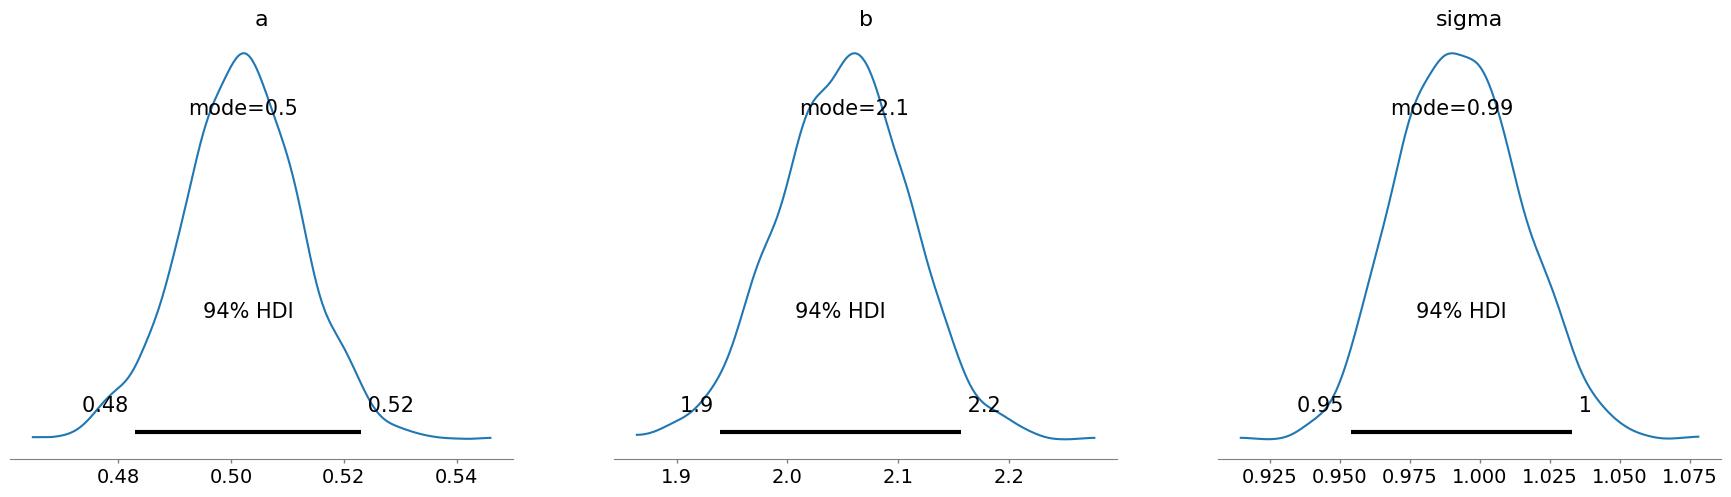

In [2]:
import pymc as pm
import numpy as np

np.random.seed(42)

x = np.random.randint(0, 100, 1000)/10
a,b = 0.5, 2
y = a*x + b + np.random.randn(1000)

# X = x.reshape(-1, 1)

with pm.Model() as model:
    pred_a = pm.Normal("a", mu = 0, sigma = 10)
    pred_b = pm.Normal("b", mu = 0, sigma = 10)
    sigma = pm.HalfNormal("sigma", sigma=1)

    mu = pred_a * x + pred_b

    Y = pm.Normal("Y", mu=mu, sigma=sigma, observed=y)

with model:
    trace = pm.sample()

vars = ['a', 'b', 'sigma']

pm.plot_trace(trace, var_names=vars, backend_kwargs={"constrained_layout":True})
display(pm.summary(trace, var_names=vars))
pm.plot_posterior(trace, point_estimate='mode')

a = float(trace.posterior.a.mean())
b = float(trace.posterior.b.mean())
sigma = float(trace.posterior.sigma.mean())
print(f"a = {a}, b = {b}, sigma={sigma}")

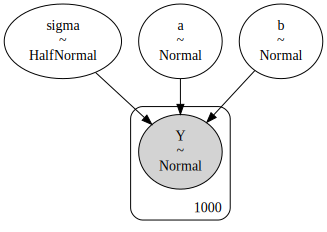

In [3]:
pm.model_to_graphviz(model)

In [4]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

a = 0.5023184737317027, b = 2.0492610216308647, sigma=0.9939503159791365
